## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Data Read/Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target/Dependent Variable](#2.1)
    - [2.2 Feature/Independent Variables Correlation with Target/Dependent Variable](#2.2)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Train](#4.1)
    - [4.2 Test](#4.2)
- [5. Model Evaluation](#5)
- [6. Conclusion](#6)

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement

We want to predict the C02 Emission produced by cars. We have many variables from the car age, the brand, the engine size, etc. In modelling we want to try to practice using simple linear regression algorithm

<a name='1.2'></a>
## 1.2 Packages

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

<a name='1.3'></a>
## 1.3 Data Read/Import

In [20]:
df = pd.read_csv("FuelConsumption.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [22]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 8 numerical features:
 ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [23]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 5 categorical features:
 ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']


In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<a name='1.5'></a>
## 1.5 Data Split

In [25]:
#80/20 split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#FOR ENGINESIZE VS CO2EMISSIONS
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

#FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

In [26]:
#80/20 split
print(f'train_x1: {train_x1.shape} ({round(len(train_x1)/len(df), 1) * 100}%)')
print(f'train_y1: {train_y1.shape} ({round(len(train_y1)/len(df), 1) * 100}%)')
print(f'test_x1: {test_x1.shape} ({round(len(test_x1)/len(df), 1) * 100}%)')
print(f'test_y1: {test_y1.shape} ({round(len(test_y1)/len(df), 1) * 100}%)')
print('')

#80/20 split
print(f'train_x2: {train_x2.shape} ({round(len(train_x2)/len(df), 1) * 100}%)')
print(f'train_y2: {train_y2.shape} ({round(len(train_y2)/len(df), 1) * 100}%)')
print(f'test_x2: {test_x2.shape} ({round(len(test_x2)/len(df), 1) * 100}%)')
print(f'test_y2: {test_y2.shape} ({round(len(test_y2)/len(df), 1) * 100}%)')

train_x1: (851, 1) (80.0%)
train_y1: (851, 1) (80.0%)
test_x1: (216, 1) (20.0%)
test_y1: (216, 1) (20.0%)

train_x2: (851, 1) (80.0%)
train_y2: (851, 1) (80.0%)
test_x2: (216, 1) (20.0%)
test_y2: (216, 1) (20.0%)


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

Text(0.5, 1.0, 'CO2 Emissions Distribution')

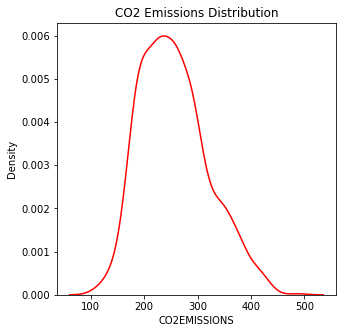

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(df['CO2EMISSIONS'], color="red")
plt.title("CO2 Emissions Distribution")

## 2.2 Features Correlation with Target

In [28]:
# Top 10 highest pearson correlation
corr_mat = df.corr().CO2EMISSIONS.sort_values(ascending=False)
corr_mat.head(8)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

From six numerical variables, five of them have very high positive correlation value ranging from 0.85 to 0.89. One variable has high negative correlation with -0.91. In this case we will only use two independent variables to try modelling simple linear regression

In [29]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", df[[variables[0], variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(1, 1))
    sns.jointplot(data = df,
                   x = df[(variables[0])],
                  y = df[(variables[1])],
                  kind='reg',
                  height=4,
                  ratio=5,
                  color='red',
                  scatter_kws={'s': 5},
                  marginal_kws={'kde': True})

Correlation:  0.8741543683958124
Correlation:  0.8921285933157569


<Figure size 72x72 with 0 Axes>

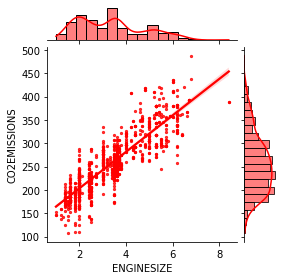

<Figure size 72x72 with 0 Axes>

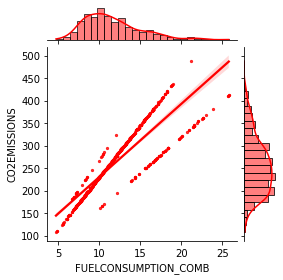

In [30]:
plotCorrelation(['ENGINESIZE', 'CO2EMISSIONS']),
plotCorrelation(['FUELCONSUMPTION_COMB', 'CO2EMISSIONS'])

<a name='1.5'></a>
## 1.5 Data Preparation

In [31]:
#80/20 split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#FOR ENGINESIZE VS CO2EMISSIONS
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

#FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

In [32]:
#80/20 split
print(f'train_x1: {train_x1.shape} ({round(len(train_x1)/len(df), 1) * 100}%)')
print(f'train_y1: {train_y1.shape} ({round(len(train_y1)/len(df), 1) * 100}%)')
print(f'test_x1: {test_x1.shape} ({round(len(test_x1)/len(df), 1) * 100}%)')
print(f'test_y1: {test_y1.shape} ({round(len(test_y1)/len(df), 1) * 100}%)')
print('')

#80/20 split
print(f'train_x2: {train_x2.shape} ({round(len(train_x2)/len(df), 1) * 100}%)')
print(f'train_y2: {train_y2.shape} ({round(len(train_y2)/len(df), 1) * 100}%)')
print(f'test_x2: {test_x2.shape} ({round(len(test_x2)/len(df), 1) * 100}%)')
print(f'test_y2: {test_y2.shape} ({round(len(test_y2)/len(df), 1) * 100}%)')

train_x1: (858, 1) (80.0%)
train_y1: (858, 1) (80.0%)
test_x1: (209, 1) (20.0%)
test_y1: (209, 1) (20.0%)

train_x2: (858, 1) (80.0%)
train_y2: (858, 1) (80.0%)
test_x2: (209, 1) (20.0%)
test_y2: (209, 1) (20.0%)


<a name='3'></a>
# 3. Feature Engineering

<a name='3.1'></a>
## 3.1 Missing Values

In [33]:
missing_data_train_count = np.isnan(train_x1).sum()
missing_data_train_percent = np.isnan(train_x1).sum() / len(train_x1) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [34]:
missing_data_test_count = np.isnan(test_x1).sum()
missing_data_test_percent = np.isnan(test_x1).sum() / len(test_x1) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [35]:
missing_data_train_count = np.isnan(train_x2).sum()
missing_data_train_percent = np.isnan(train_x2).sum() / len(train_x2) * 100

missing_data_train_count = pd.Series(missing_data_train_count)  
missing_data_train_percent = pd.Series(missing_data_train_percent)

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [36]:
missing_data_test_count = np.isnan(test_x2).sum()
missing_data_test_percent = np.isnan(test_x2).sum() / len(test_x2) * 100

missing_data_test_count = pd.Series(missing_data_train_count)  
missing_data_test_percent = pd.Series(missing_data_train_percent)

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


<a name='4'></a>
# 4. Model

<a name='4'></a>
## 4.1 Train

In [37]:
from sklearn import linear_model

#FOR ENGINESIZE VS CO2EMISSIONS
regr1 = linear_model.LinearRegression()
regr1.fit(train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ', regr1.intercept_)
print (' ')

#FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
regr2 = linear_model.LinearRegression()
regr2.fit(train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ', regr2.intercept_)

Coefficients:  [[38.94291168]]
Intercept:  [125.93167125]
 
Coefficients:  [[16.37125381]]
Intercept:  [66.72057735]


Text(0, 0.5, 'Emission')

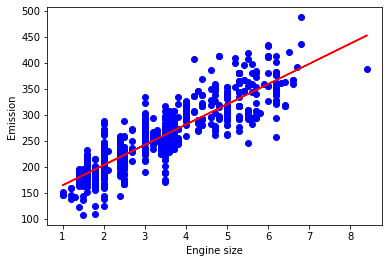

In [38]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

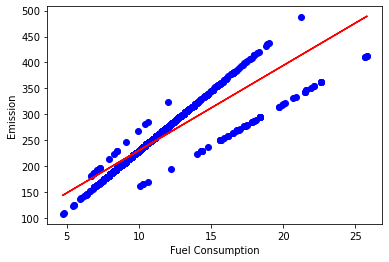

In [39]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")

<a name='4'></a>
## 4.2 Test

In [40]:
test_y1_ = regr1.predict(test_x1)
test_y2_ = regr2.predict(test_x2)

<a name='5'></a>
# 5. Model Evaluation

Mean absolute error: 25.43
Residual sum of squares (MSE): 1206.49
R2-score: 0.74


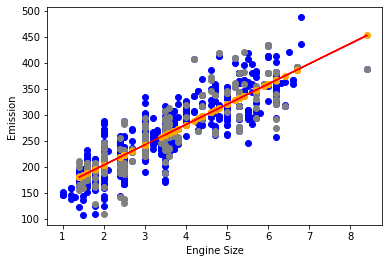

In [41]:
from sklearn.metrics import r2_score

plt.scatter(train_x1, train_y1,  color='blue')
plt.scatter(test_x1, test_y1,  color='grey')
plt.scatter(test_x1, test_y1_,  color='orange')
plt.plot(test_x1, regr1.coef_[0][0]*test_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_ - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1 , test_y1_) )

Mean absolute error: 23.33
Residual sum of squares (MSE): 1042.37
R2-score: 0.78


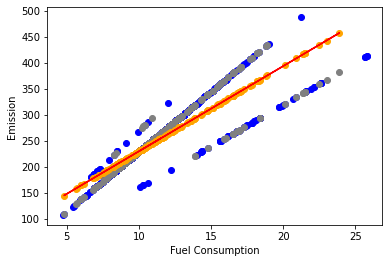

In [42]:
from sklearn.metrics import r2_score

plt.scatter(train_x2, train_y2,  color='blue')
plt.scatter(test_x2, test_y2,  color='grey')
plt.scatter(test_x2, test_y2_,  color='orange')
plt.plot(test_x2, regr2.coef_[0][0]*test_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_ - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_ - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2 , test_y2_) )

<a name='6'></a>
# 6. Conclusion

The R_Squared and the mean absolute error scores are 0.74 and 25.43 respectively for the engine size and emission case. The R_Squared and the mean absolute error scores are 0.78 and 23.33 respectively for the fuel consumption and emission case. From both cases, we can conclude that both variables are good predictors for emission variable.